In [40]:
# import libraries
import pandas as pd
import numpy as np
import math
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyoff
import plotly.figure_factory as ff
import datetime
from pandas import to_datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.api as smt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt

from fbprophet import Prophet
from matplotlib import pyplot
from scipy.stats import boxcox

pio.renderers
pio.renderers.default='notebook+jupyterlab'
plotly.offline.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("../data/top_selling_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1740 non-null   object 
 1   InvoiceNo    1740 non-null   int64  
 2   StockCode    1740 non-null   int64  
 3   Description  1740 non-null   object 
 4   Quantity     1740 non-null   int64  
 5   InvoiceDate  1740 non-null   object 
 6   UnitPrice    1740 non-null   float64
 7   CustomerID   1740 non-null   float64
 8   Country      1740 non-null   object 
 9   Year         1740 non-null   int64  
 10  Quarter      1740 non-null   int64  
 11  Month        1740 non-null   int64  
 12  Week         1740 non-null   int64  
 13  Day          1740 non-null   int64  
 14  Weekday      1740 non-null   int64  
 15  Total_Sales  1740 non-null   float64
dtypes: float64(3), int64(9), object(4)
memory usage: 217.6+ KB


In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Quarter,Month,Week,Day,Weekday,Total_Sales
0,2011-05-10,552654,23084,RABBIT NIGHT LIGHT,2,2011-05-10 14:20:00,2.08,15756.0,United Kingdom,2011,2,5,19,10,1,4.16
1,2011-05-11,552724,23084,RABBIT NIGHT LIGHT,6,2011-05-11 10:29:00,2.08,13418.0,United Kingdom,2011,2,5,19,11,2,12.48
2,2011-05-11,552811,23084,RABBIT NIGHT LIGHT,24,2011-05-11 12:43:00,1.79,17677.0,United Kingdom,2011,2,5,19,11,2,42.96
3,2011-05-11,552816,23084,RABBIT NIGHT LIGHT,1,2011-05-11 12:47:00,2.08,15521.0,United Kingdom,2011,2,5,19,11,2,2.08
4,2011-05-11,552822,23084,RABBIT NIGHT LIGHT,30,2011-05-11 12:59:00,1.79,15521.0,United Kingdom,2011,2,5,19,11,2,53.70


In [70]:
df1 = df.loc[df['Description']=='POPCORN HOLDER']
df1 = df1.groupby(['Date'])['Quantity'].sum().reset_index()
df1 = df1[['Date', 'Quantity']]

In [71]:
df1.shape

(149, 2)

In [72]:
fig = go.Figure(data=[go.Scatter(x=df1.Date, y=df1.Quantity, line_color='darkturquoise')])
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Total Quantity", 
                  title='Daily Sales by Quantity',
                  height=400,
                 template='ggplot2')
fig.show()

In [73]:
df_split = df1[:100]

In [74]:
df1p = pd.DataFrame()
df1p['ds'] = df_split['Date']
df1p['y'] = df_split['Quantity']
df1p['ds']= to_datetime(df1p['ds'])

In [75]:
df1p

,ds,y
0,2011-06-12,9
1,2011-06-13,15
2,2011-06-14,14
3,2011-06-15,103
4,2011-06-16,9
...,...,...
95,2011-10-09,126
96,2011-10-10,142
97,2011-10-11,78
98,2011-10-12,198


In [76]:
m = Prophet()
m.fit(df1p)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

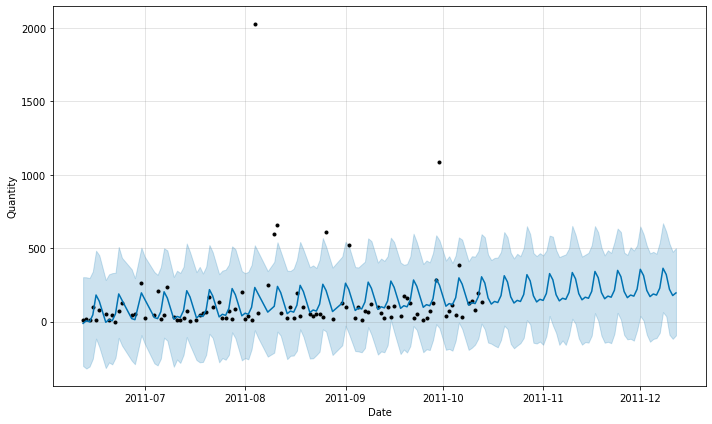

In [81]:
figure = m.plot(forecast, xlabel='Date', ylabel='Quantity')

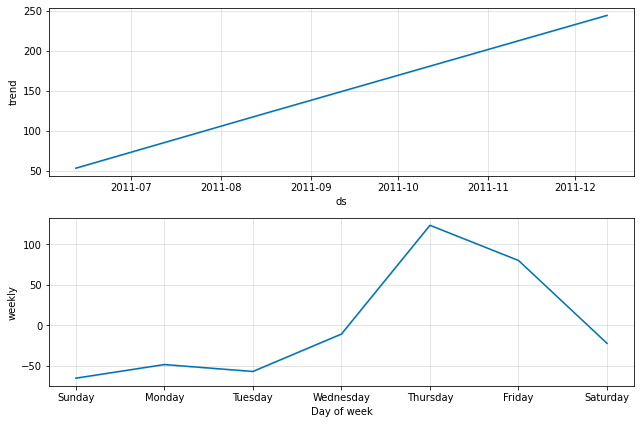

In [82]:
figure2 = m.plot_components(forecast)

In [83]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
140,2011-11-23,224.554653,-82.861477,541.329587,224.500773,224.612533,-10.767016,-10.767016,-10.767016,-10.767016,-10.767016,-10.767016,0.0,0.0,0.0,213.787637
141,2011-11-24,225.593191,60.180551,634.301459,225.537246,225.653367,123.638027,123.638027,123.638027,123.638027,123.638027,123.638027,0.0,0.0,0.0,349.231218
142,2011-11-25,226.631729,14.628387,610.869685,226.574702,226.693796,80.156968,80.156968,80.156968,80.156968,80.156968,80.156968,0.0,0.0,0.0,306.788697
143,2011-11-26,227.670268,-90.038622,470.921024,227.611169,227.734832,-22.303701,-22.303701,-22.303701,-22.303701,-22.303701,-22.303701,0.0,0.0,0.0,205.366566
144,2011-11-27,228.708806,-120.539574,454.541978,228.647663,228.774568,-65.291852,-65.291852,-65.291852,-65.291852,-65.291852,-65.291852,0.0,0.0,0.0,163.416954
145,2011-11-28,229.747344,-116.530394,506.531218,229.684475,229.814813,-48.442027,-48.442027,-48.442027,-48.442027,-48.442027,-48.442027,0.0,0.0,0.0,181.305317
146,2011-11-29,230.785882,-129.256441,484.767481,230.720313,230.855460,-56.990400,-56.990400,-56.990400,-56.990400,-56.990400,-56.990400,0.0,0.0,0.0,173.795483
147,2011-11-30,231.824421,-58.008351,518.681304,231.756206,231.896260,-10.767016,-10.767016,-10.767016,-10.767016,-10.767016,-10.767016,0.0,0.0,0.0,221.057405
148,2011-12-01,232.862959,38.718945,648.740521,232.792401,232.936924,123.638027,123.638027,123.638027,123.638027,123.638027,123.638027,0.0,0.0,0.0,356.500986
149,2011-12-02,233.901497,7.621656,596.499207,233.828313,233.978264,80.156968,80.156968,80.156968,80.156968,80.156968,80.156968,0.0,0.0,0.0,314.058466
